In [9]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### Reading the dataset

In [10]:
# Read the file "Boston_housing.csv" as a dataframe

df = pd.read_csv("Boston_housing.csv")

## Predictors & Response variables

Select the following columns as predictors
- crim
- indus
- nox
- rm
- age
- dis
- rad
- tax
- ptratio
- black
- lstat

#### Select the 'medv' column as response variable

In [11]:
# Select a subdataframe of predictors

X = df[['crim','indus','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]#df[df.columns.to_list()[:-1]]

# Normalize the values of the dataframe 

X_norm = preprocessing.normalize(X)

# Select the response variable

y = df['medv']

### Split the dataset into train and validation sets

Keep the test size as 30% of the dataset, and use ```random_state```=31

In [12]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_norm,y,test_size=0.3,random_state=31)


### Multi-linear Regression Analysis

In [13]:
#Fit a linear regression model

lreg = LinearRegression()
lreg.fit(X_train, y_train)

# Predict on the validation set

y_val_pred = lreg.predict(X_val)

### Computing the MSE for Multi-Linear Regression

In [14]:
# Use the mean_squared_error function to compute the mse

mse = mean_squared_error(y_val,y_val_pred)

# print the MSE value

print ("Multi-linear regression MSE is", mse)

Multi-linear regression MSE is 20.133951375165264


### Obtaining the coefficients of the predictors

In [15]:
#make a dictionary of the coefficients along with the predictors as keys

lreg_coef = dict(zip(X.columns, np.transpose(lreg.coef_)))
lreg_x = list(lreg_coef.keys())
lreg_y = list(lreg_coef.values())

### Implementing Lasso regularization

In [16]:
# Now, you will implement the lasso regularisation

# Use alpha = 0.008

lasso_reg = Lasso(alpha=0.008)
lasso_reg.fit(X_train,y_train)

#Make a prediction using the above trained model

y_val_pred =lasso_reg.predict(X_val)


### Computing the MSE with Lasso regularization

In [17]:
# Again, calculate the MSE & print it

mse_lasso = mean_squared_error(y_val,y_val_pred)

print ("Lasso MSE is", mse_lasso)

Lasso MSE is 31.676774400084458


### Obtaining the coefficients of the predictors

In [18]:
# Use the helper code below to make a dictionary of the predictors along with the coefficients associated with them

lasso_coef = dict(zip(X.columns, np.transpose(lasso_reg.coef_))) 

lasso_x = list(lasso_coef.keys())
lasso_y = list(lasso_coef.values())

### Implementing Ridge regularization

In [19]:
# Now, we do the same as above, but we use L2 regularisation

# Again, use alpha=0.008

ridgeReg = Ridge(alpha=0.008)

ridgeReg.fit(X_train,y_train)

y_val_pred = ridgeReg.predict(X_val)


### Computing the MSE with Ridge regularization

In [20]:
### edTest(test_mse) ###

# Calculate the MSE & print it

mse_ridge = mean_squared_error(y_val,y_val_pred)
print ("Ridge MSE is", mse_ridge)

Ridge MSE is 28.05365901018082


### Obtaining the coefficients of the predictors

In [21]:
# Use the helper code below to make a dictionary of the predictors along with the coefficients associated with them 

ridge_coef = dict(zip(X.columns, np.transpose(ridgeReg.coef_))) 
ridge_x = list(ridge_coef.keys())
ridge_y = list(ridge_coef.values())

### Plotting the graph

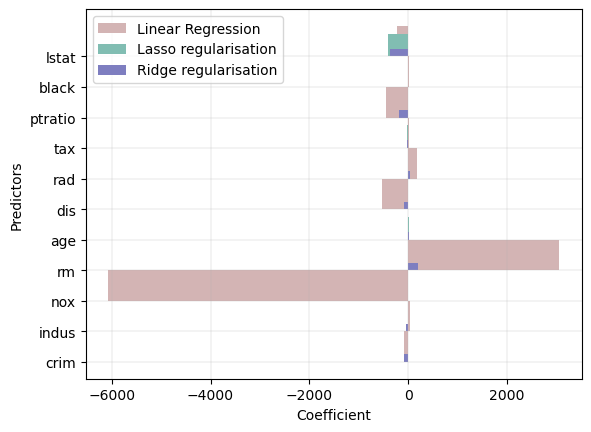

In [22]:
# Use the code below to visualise your results

plt.rcdefaults()
#fig, ax = plt.subplots(1,1)

plt.barh(lreg_x,lreg_y,1.0, align='edge',color="#D3B4B4", label="Linear Regression")
plt.barh(lasso_x,lasso_y,0.75 ,align='edge',color="#81BDB2",label = "Lasso regularisation")
plt.barh(ridge_x,ridge_y,0.25 ,align='edge',color="#7E7EC0", label="Ridge regularisation")



# plt.barh(lreg_x,lreg_y, align='center',color="#D3B4B4", label="Linear Regression")
# plt.barh(lasso_x,lasso_y, align='center',color="#007D66", alpha=0.5,label = "Lasso regularisation")
# plt.barh(ridge_x,ridge_y, align='center',color="darkblue",alpha=0.5, label="Ridge regularisation")
plt.grid(linewidth=0.2)
plt.xlabel("Coefficient")
plt.ylabel("Predictors")
plt.legend(loc='best')
#ax.set_xlim(-7000,4000)
#ax.autoscale(tight=True)
plt.show()

### Compare the results of linear regression with that of lasso and ridge regularization.

Your answer here

### After marking, change the alpha values to 1000. What happens to the coefficients when alpha increases?

Your answer here